# Modeling a random system

This notebook introduces a random system that we try to represent with a model.

To start, we import a few Python libraries that will be used throughout the notebook.

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

## A hypothetical climate system

Below, we define a model of a hypothetical climate system. This climate has one variable **temperature** which starts at 0 and changes every year by a random amount. This is also called a random walk. The random step follows a normal distribution with a mean value **a** and a standard deviation **b**. These are the parameters of the model.

In [2]:
def simulate_temperature(a, b):
    
    # Prepare simulation
    temperature = 0
    n_years = 100
    data = {
        'year': np.arange(n_years), 
        'temperature': np.zeros(n_years),
        'temperature_change': np.zeros(n_years)
    }
    
    # Simulate year by year
    for year in range(n_years):
        
        # Generate random temperature change
        temperature_change = random.gauss(a, b)
        
        # Add temperature change to temperature
        temperature += temperature_change
        
        # Record data from the current year
        data['temperature_change'][year] = temperature_change
        data['temperature'][year] = temperature
        
    # Return recorded data as a dataframe
    return pd.DataFrame(data)

Imagine that the following data is an observation from our target system (the actual system, not the model). 
We observe the temperature of our climate for 100 years:

In [3]:
observed_data = simulate_temperature(0, 1)

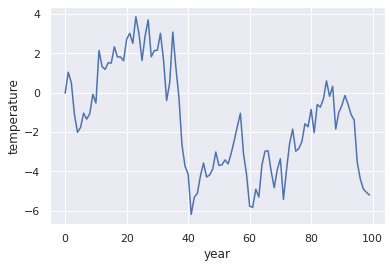

In [4]:
sns.lineplot(data=observed_data, x='year', y='temperature');

## A regression model

We now try to represent this system by building a regression model to fit the observed data.

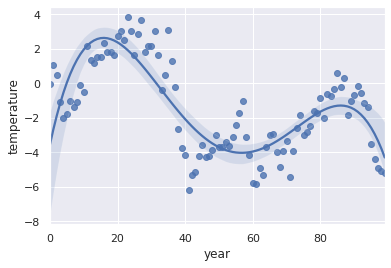

In [5]:
sns.regplot(data=observed_data, x='year', y='temperature', order=4);

This approach can sometimes be useful to see trends and make forecasts, but usually doesn't increase our understanding of the system since it does not attempt to represent the underlying mechanisms. In this case, it is also not useful to make forecasts, as we know that the system is completely random.

## A simulation model

The following model is a correct representation of the target system. An experiment can run the model multiple times. We run the model 1000 times.

In [6]:
def experiment(a, b, runs):
    data = pd.DataFrame()
    for i in range(runs):
        df = simulate_temperature(a, b)
        df['run'] = i
        data = data.append(df)
    return data

In [7]:
simulated_data = experiment(0, 1, 1000)

Even though the model is correct, it is not able to reproduce the same data series (which is one random outcome of an infinite number of possible random outcomes).

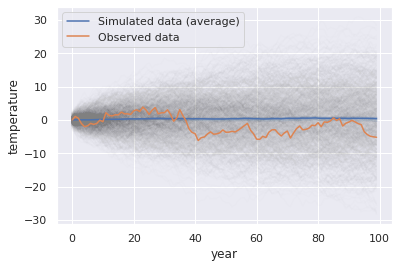

In [8]:
sns.lineplot(data=simulated_data, x='year', y='temperature', units="run", estimator=None, color='grey', alpha=0.01);
sns.lineplot(data=simulated_data, x='year', y='temperature', label='Simulated data (average)')
sns.lineplot(data=observed_data, x='year', y='temperature', label='Observed data')
plt.legend();

However, we can validate the model by looking at the distribution of temperature change between years.

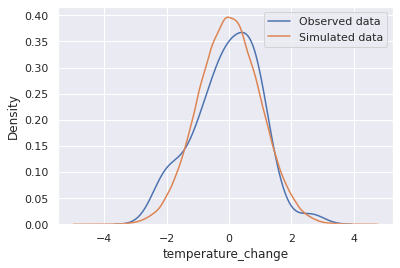

In [9]:
sns.kdeplot(data=observed_data, x='temperature_change', label='Observed data')
sns.kdeplot(data=simulated_data, x='temperature_change', label='Simulated data')
plt.legend();

You are invited to experiment with this notebook and change the model!

Questions for discussion:
- Would we have been able to find out this correlation without knowing the underlying mechanism? 
- How could we have found out the underlying mechanism from only the observed data? 
- What if we had less data and the distribution of the observed data wouldn't have a clear shape? 
- What if the distribution parameters of the system would be different every year because they are adaptive?